<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [35]:

from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import tensorflow as tf
import tensorflow.keras as keras
import zipfile

**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

In [36]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data downloaden</h3>

In [37]:
dataUrl = requests.get("http://madm.dfki.de/files/sentinel/EuroSAT.zip")
dataFile = zipfile.ZipFile(io.BytesIO(dataUrl.content))

In [38]:
# get file names
txtFiles = list()

for txtFile in dataFile.namelist():
    txtFiles.append(txtFile)
    # print(txtFile)

<h3>Data filteren</h3>

In [39]:
txtFiles = [x for x in txtFiles if ".jpg" in x]



<h3>Data inlezen</h3>

In [40]:
imageObjects = np.zeros([len(txtFiles), 64, 64, 3])

i = 0

for pic in txtFiles:
  imageObjects[i] = np.asarray(Image.open(dataFile.open(pic))).astype('uint8')/255
  i += 1
    
# print(imageObjects[0])    

**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [43]:
imageLabels = np.empty(len(txtFiles), dtype = 'S20')

i = 0

for label in txtFiles:
    txtFiles[i] = label.split('/')[1]
    i += 1
    
print(txtFiles[0])    

River


In [27]:
# change them to integers in alphabetical order
labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
# print(labelNames)
# print(labelNumbers)

np.array(np.unique(labelNumbers, return_counts=True)).T

array([[   0, 3000],
       [   1, 3000],
       [   2, 3000],
       [   3, 2500],
       [   4, 2500],
       [   5, 2000],
       [   6, 2500],
       [   7, 3000],
       [   8, 2500],
       [   9, 3000]], dtype=int64)

<h3>Data splitten</h3>

In [28]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.90, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)

(24300, 64, 64, 3)


<h3>Data inspecteren</h3>

In [29]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

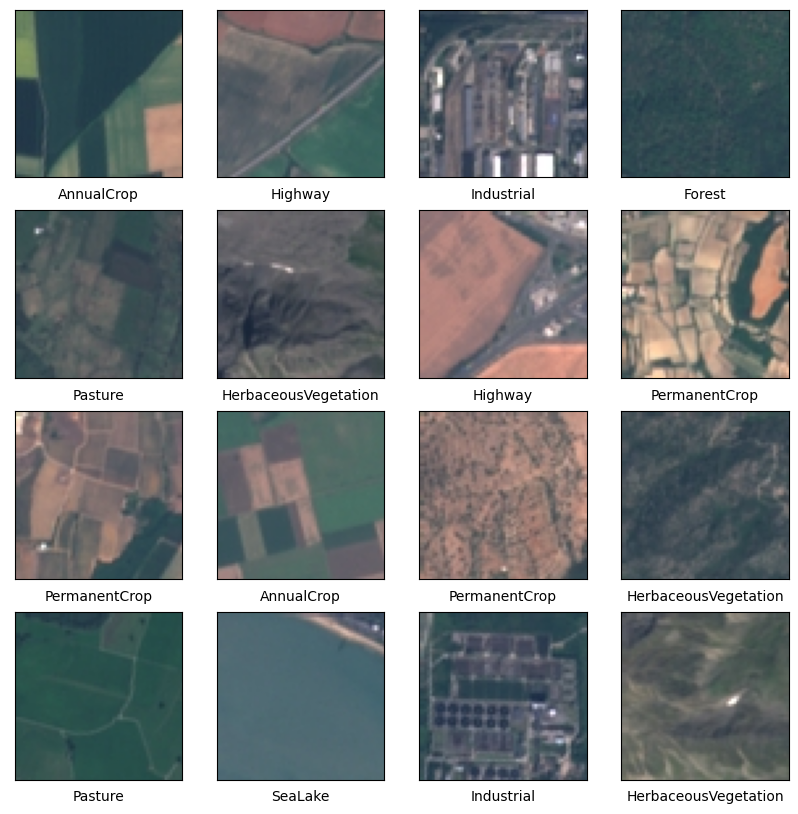

In [30]:
inspectData()    

<h2>Maak een model</h2>

<h3>Definieer de netwerktopologie</h3>

<h3>Exercise 1</h3>
<p>
    Vul de netwerktopologie tot een bruikbaar Neural Netwerk onstaat.
</p>

In [31]:
from tensorflow.keras import datasets, layers, models

model = keras.models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(64, activation='relu'))



<h3>Definieer de trainparameters</h3>

In [32]:
lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 50

In [33]:
# print(len(trainSet))
# print(trainLabels)
print(labelNames)
print(labelNumbers)

['AnnualCrop' 'Forest' 'HerbaceousVegetation' 'Highway' 'Industrial'
 'Pasture' 'PermanentCrop' 'Residential' 'River' 'SeaLake']
[8 8 8 ... 6 6 6]


<h3>Train het model</h3>

In [34]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics=['accuracy'])
model.fit(trainSet, trainLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)
model.summary()


Epoch 1/50


ValueError: in user code:

    File "c:\Users\Anton\MakeAIWork2\env\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Anton\MakeAIWork2\env\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Anton\MakeAIWork2\env\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Anton\MakeAIWork2\env\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Anton\MakeAIWork2\env\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Anton\MakeAIWork2\env\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_1" (type Sequential).
    
    Input 0 of layer "max_pooling2d_2" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 64)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 64, 64, 3), dtype=float32)
      • training=True
      • mask=None


In [ ]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 12288)             0         
                                                                 
 dense_13 (Dense)            (None, 64)                786496    
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
Total params: 794,816
Trainable params: 794,816
Non-trainable params: 0
_________________________________________________________________


<h3>Test het model</h3>

<h3>Exercise 2</h3>
<p>
    Test het Neural Netwerk met de testset en laat zien of het in staat is de juiste class te vinden.
</p>